<a href="https://colab.research.google.com/github/Palakk06/Data-Analytics-Visualisation/blob/main/Aerofit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
df = pd.read_csv('/content/sample_data/aerofit_treadmill.csv')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
#The data type of all columns in the “customers” table.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# You can find the number of rows and columns given in the dataset

df.shape

(180, 9)

In [ ]:
#  Check for the missing values and find the number of missing values in each column

missing_values = df.isnull().sum()
missing_values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
## 2. Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
# Find the outliers for every continuous variable in the dataset

df.describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
'''
Insights:
 - Here it is showing that Income has average value of 53719.57778 than other comapring factors of Numeric Variable
'''

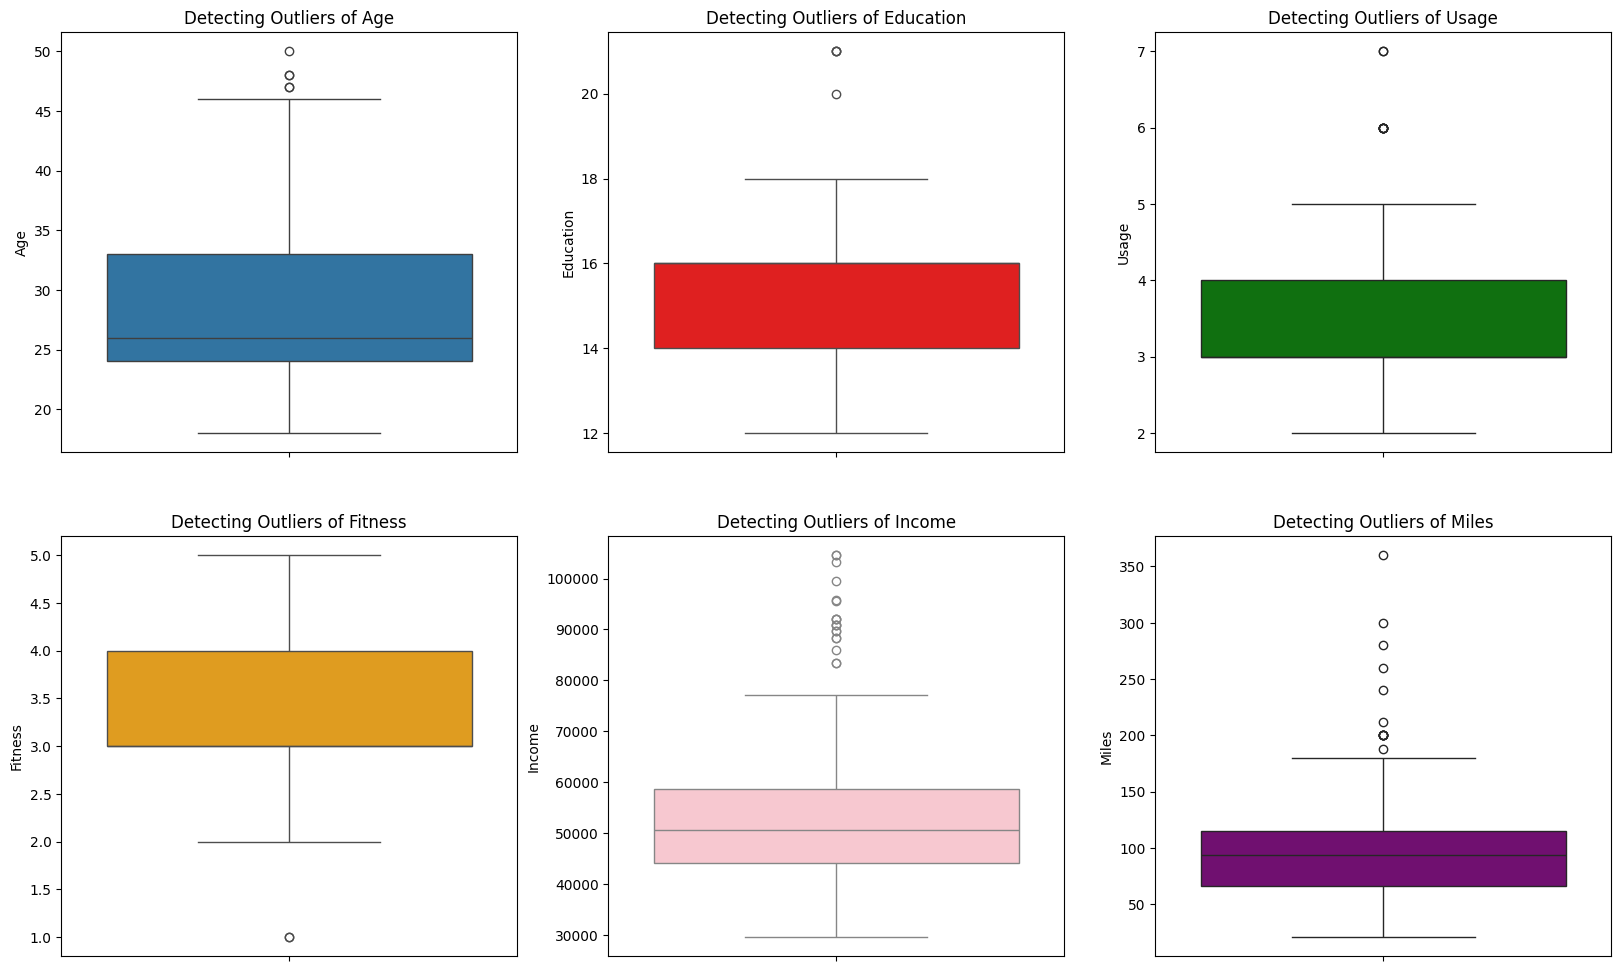

In [ ]:
plt.figure(figsize=(20,12))

plt.subplot(2, 3, 1)
plt.title("Detecting Outliers of Age",fontsize = 12)
sns.boxplot( y= df.Age)

plt.subplot(2, 3, 2)
plt.title("Detecting Outliers of Education",fontsize = 12)
sns.boxplot( y= df.Education, color ='red')

plt.subplot(2, 3, 3)
plt.title("Detecting Outliers of Usage",fontsize = 12)
sns.boxplot( y= df.Usage, color='green')

plt.subplot(2, 3, 4)
plt.title("Detecting Outliers of Fitness",fontsize = 12)
sns.boxplot( y= df.Fitness, color='orange')

plt.subplot(2, 3, 5)
plt.title("Detecting Outliers of Income",fontsize = 12)
sns.boxplot( y= df.Income, color='pink')

plt.subplot(2, 3, 6)
plt.title("Detecting Outliers of Miles",fontsize = 12)
sns.boxplot( y= df.Miles, color='purple')

plt.show()

In [ ]:
'''
Insights:
      Age has highest excluding outliers
'''

In [ ]:
#  Remove/clip the data between the 5 percentile and 95 percentile
data_5p = np.percentile(df.Income, 5)
data_95p = np.percentile(df.Income, 95)

In [ ]:
percent_data = np.clip(df.Income, data_5p, data_95p)
percent_data

0      34053.15
1      34053.15
2      34053.15
3      34053.15
4      35247.00
         ...   
175    83416.00
176    89641.00
177    90886.00
178    90948.25
179    90948.25
Name: Income, Length: 180, dtype: float64

In [ ]:
percent_df = df.loc[df.Income.isin(percent_data)]
percent_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
4,KP281,20,Male,13,Partnered,4,2,35247,47
6,KP281,21,Female,14,Partnered,3,3,35247,75
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85
10,KP281,22,Male,14,Single,3,3,36384,85
...,...,...,...,...,...,...,...,...,...
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200


In [ ]:
df.shape

(180, 9)

In [ ]:
percent_df.shape

(162, 9)

In [ ]:
percent_df.Product = percent_df["Product"].apply(lambda x: int(x[2:]))

<ipython-input-76-c61c21f9fd18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_df.Product = percent_df["Product"].apply(lambda x: int(x[2:]))


In [ ]:
percent_df.Gender = percent_df.Gender.apply(lambda x: 1 if x == "Male" else 0)
percent_df

<ipython-input-77-4ad56798c7e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_df.Gender = percent_df.Gender.apply(lambda x: 1 if x == "Male" else 0)


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
4,281,20,1,13,Partnered,4,2,35247,47
6,281,21,0,14,Partnered,3,3,35247,75
8,281,21,1,15,Single,5,4,35247,141
9,281,21,0,15,Partnered,2,3,37521,85
10,281,22,1,14,Single,3,3,36384,85
...,...,...,...,...,...,...,...,...,...
167,781,30,0,16,Partnered,6,5,90886,280
170,781,31,1,16,Partnered,6,5,89641,260
175,781,40,1,21,Single,6,5,83416,200
176,781,42,1,18,Single,5,4,89641,200


In [ ]:
percent_df.loc[:, 'MaritalStatus'] = percent_df['MaritalStatus'].apply(lambda x: 1 if x == "Partnered" else 0)
percent_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
4,281,20,1,13,1,4,2,35247,47
6,281,21,0,14,1,3,3,35247,75
8,281,21,1,15,0,5,4,35247,141
9,281,21,0,15,1,2,3,37521,85
10,281,22,1,14,0,3,3,36384,85
...,...,...,...,...,...,...,...,...,...
167,781,30,0,16,1,6,5,90886,280
170,781,31,1,16,1,6,5,89641,260
175,781,40,1,21,0,6,5,83416,200
176,781,42,1,18,0,5,4,89641,200


In [ ]:
percent_df.MaritalStatus.value_counts()

MaritalStatus
1    96
0    66
Name: count, dtype: int64

In [ ]:
percent_df[["Product", "Age", "MaritalStatus", "Gender"]].corr()

,Product,Age,MaritalStatus,Gender
Product,1.000000,-0.113215,-0.097672,0.245052
Age,-0.113215,1.000000,0.141421,0.019557
MaritalStatus,-0.097672,0.141421,1.000000,0.016855
Gender,0.245052,0.019557,0.016855,1.000000


<Axes: >

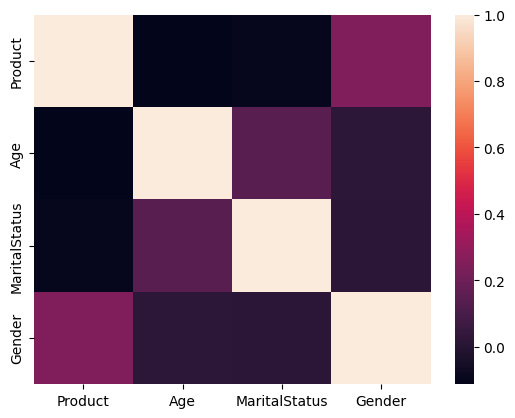

In [ ]:
sns.heatmap(percent_df[["Product", "Age", "MaritalStatus", "Gender"]].corr())

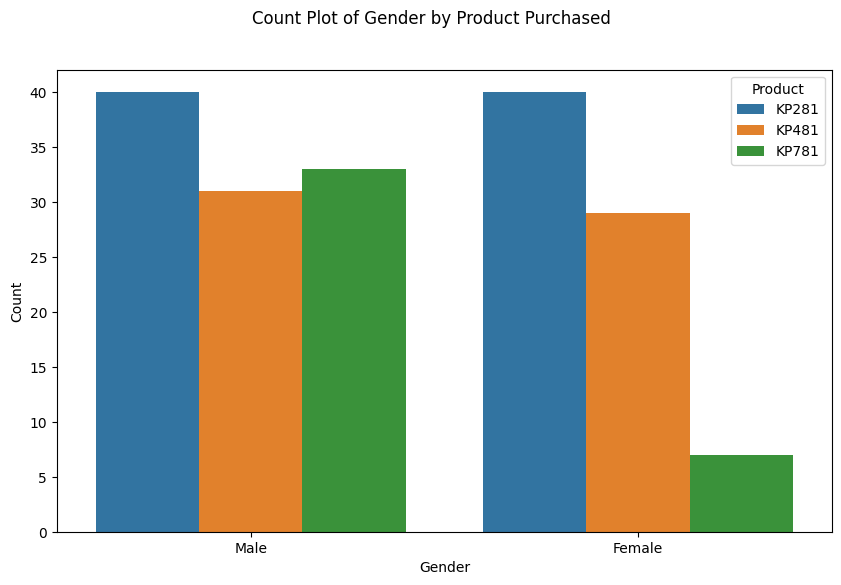

In [ ]:
# 3. Check if features like marital status, Gender, and age have any effect on the product purchased
# Find if there is any relationship between the categorical variables and the output variable in the data.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x = df.Gender, hue='Product')
plt.suptitle('Count Plot of Gender by Product Purchased')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Product')
plt.show()

In [ ]:
'''
Insights:
  - By Gender Male counts is more as compare to female in all product based purchases
'''

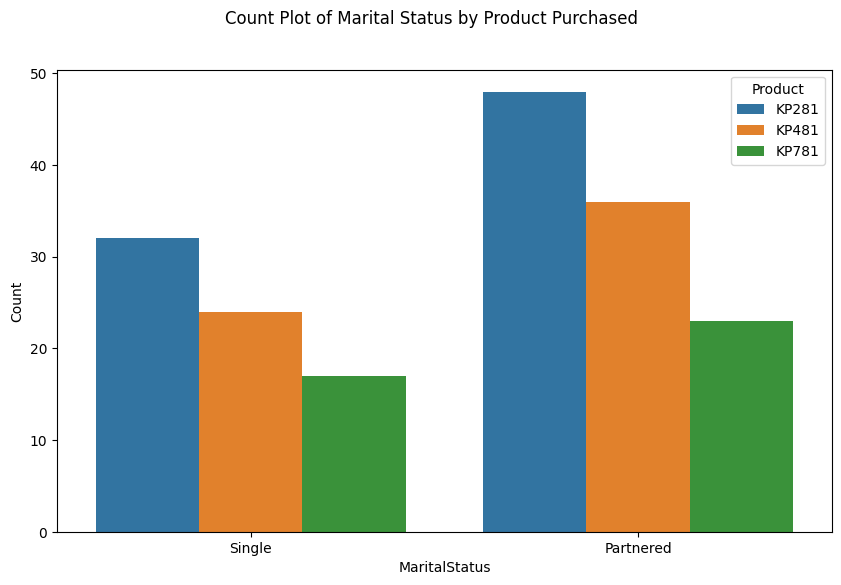

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x = df.MaritalStatus, hue='Product')
plt.suptitle('Count Plot of Marital Status by Product Purchased')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.legend(title='Product')
plt.show()

In [ ]:
'''
Insights:
      As we can see by Marital Status Partnered has more popular than singles for product based purchases
'''

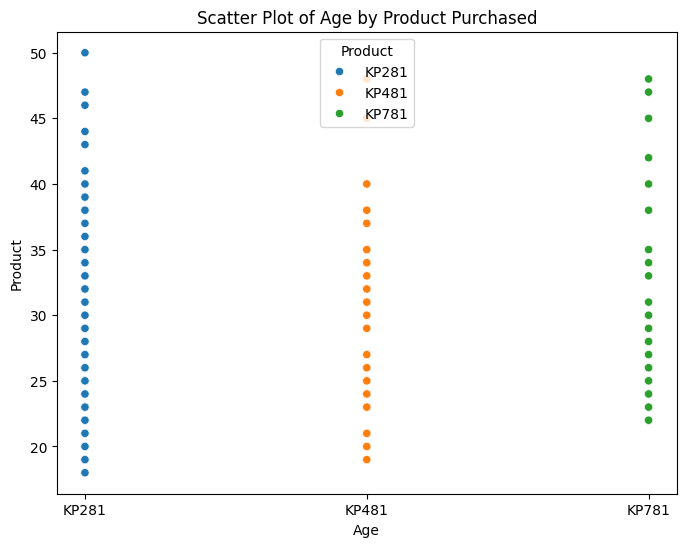

In [ ]:
# Find if there is any relationship between the continuous variables and the output variable in the data.

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x= 'Product', y= df.Age, hue='Product')
plt.title('Scatter Plot of Age by Product Purchased')
plt.xlabel('Age')
plt.ylabel('Product')
plt.legend(title='Product')
plt.show()

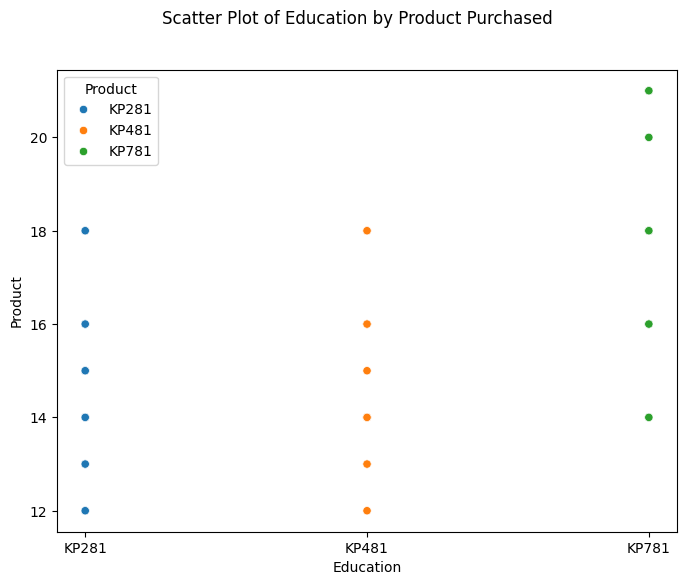

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Product', y= df.Education, hue='Product')
plt.suptitle('Scatter Plot of Education by Product Purchased')
plt.xlabel('Education')
plt.ylabel('Product')
plt.legend(title='Product')
plt.show()

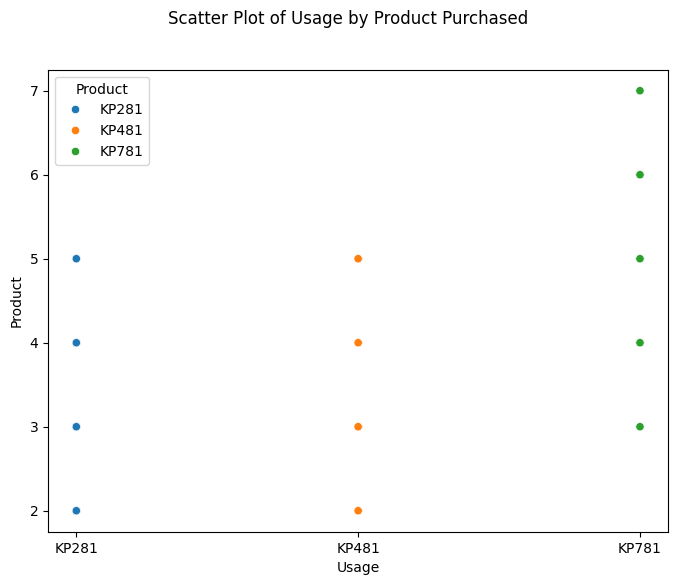

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x= 'Product', y= df.Usage, hue='Product')
plt.suptitle('Scatter Plot of Usage by Product Purchased')
plt.xlabel('Usage')
plt.ylabel('Product')
plt.legend(title='Product')
plt.show()

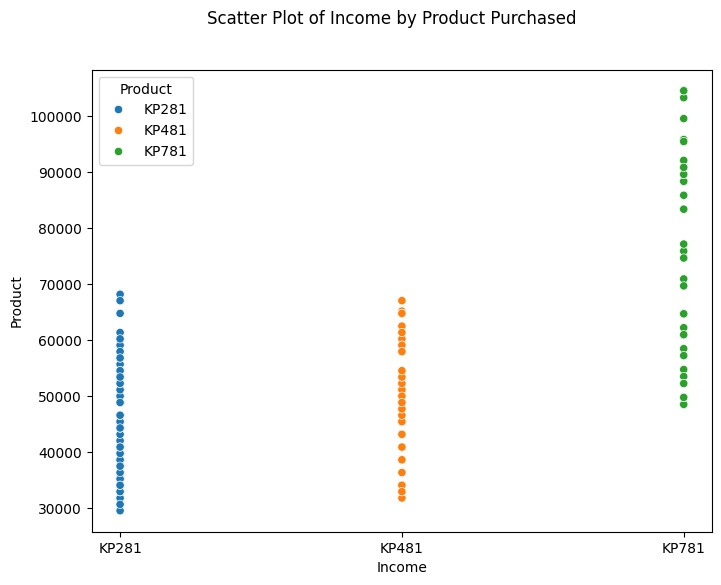

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x= 'Product', y= df.Income, hue='Product')
plt.suptitle('Scatter Plot of Income by Product Purchased')
plt.xlabel('Income')
plt.ylabel('Product')
plt.legend(title='Product')
plt.show()

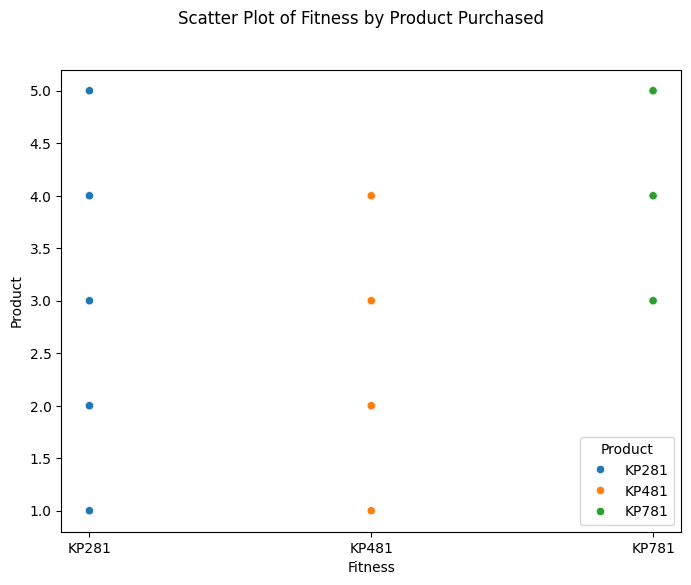

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x= 'Product', y= df.Fitness, hue='Product')
plt.suptitle('Scatter Plot of Fitness by Product Purchased')
plt.xlabel('Fitness')
plt.ylabel('Product')
plt.legend(title='Product')
plt.show()

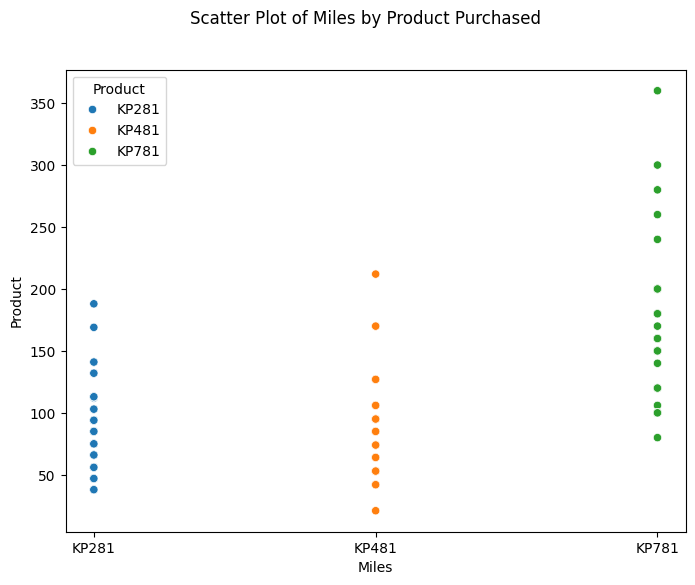

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x= 'Product', y= df.Miles, hue='Product')
plt.suptitle('Scatter Plot of Miles by Product Purchased')
plt.xlabel('Miles')
plt.ylabel('Product')
plt.legend(title='Product')
plt.show()

In [ ]:
# 4. Representing the Probability
# Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)

product_percent = pd.crosstab(index= df['Product'], columns = 'counts')
product_percent

col_0,counts
Product,
KP281,80
KP481,60
KP781,40


In [ ]:
product_probabilities = (product_percent / product_percent.sum())*100
product_probabilities

col_0,counts
Product,
KP281,44.444444
KP481,33.333333
KP781,22.222222


In [ ]:
# Find the probability that the customer buys a product based on each column.
# Calculate the conditional probabilities using pd.crosstab()
conditional_probabilities_age = pd.crosstab(percent_df['Age'], percent_df['Product'], normalize='index')
print("Conditional Probabilities based on Age:")
print(conditional_probabilities_age)


Conditional Probabilities based on Age:
Product     KP281     KP481     KP781
Age                                  
20       0.333333  0.666667  0.000000
21       0.600000  0.400000  0.000000
22       0.571429  0.000000  0.428571
23       0.444444  0.388889  0.166667
24       0.416667  0.250000  0.333333
25       0.280000  0.440000  0.280000
26       0.583333  0.250000  0.166667
27       0.428571  0.142857  0.428571
28       0.750000  0.000000  0.250000
29       0.500000  0.166667  0.333333
30       0.400000  0.400000  0.200000
31       0.333333  0.500000  0.166667
32       0.500000  0.500000  0.000000
33       0.285714  0.714286  0.000000
34       0.400000  0.600000  0.000000
35       0.428571  0.571429  0.000000
36       1.000000  0.000000  0.000000
37       0.500000  0.500000  0.000000
38       0.666667  0.333333  0.000000
39       1.000000  0.000000  0.000000
40       0.200000  0.600000  0.200000
41       1.000000  0.000000  0.000000
42       0.000000  0.000000  1.000000
43       1

In [ ]:
conditional_probabilities_gender = pd.crosstab(percent_df['Gender'], percent_df['Product'], normalize='index')
print("\nConditional Probabilities based on Gender:")
print(conditional_probabilities_gender)


Conditional Probabilities based on Gender:
Product     KP281     KP481     KP781
Gender                               
Female   0.527778  0.402778  0.069444
Male     0.400000  0.311111  0.288889


In [ ]:
conditional_probabilities_education = pd.crosstab(df['Education'],df['Product'], normalize='index')
print("\nConditional Probabilities based on Education:")
print(conditional_probabilities_education)


Conditional Probabilities based on Education:
Product       KP281     KP481     KP781
Education                              
12         0.666667  0.333333  0.000000
13         0.600000  0.400000  0.000000
14         0.545455  0.418182  0.036364
15         0.800000  0.200000  0.000000
16         0.458824  0.364706  0.176471
18         0.086957  0.086957  0.826087
20         0.000000  0.000000  1.000000
21         0.000000  0.000000  1.000000


In [ ]:
conditional_probabilities_marital_status = pd.crosstab(percent_df['MaritalStatus'], percent_df['Product'], normalize='index')
print("\nConditional Probabilities based on Marital Status:")
print(conditional_probabilities_marital_status)


Conditional Probabilities based on Marital Status:
Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.479167  0.364583  0.156250
Single         0.424242  0.333333  0.242424


In [ ]:
conditional_probabilities_usage = pd.crosstab(df['Usage'], df['Product'], normalize='index')
print("\nConditional Probabilities based on Usage:")
print(conditional_probabilities_usage)


Conditional Probabilities based on Usage:
Product     KP281     KP481     KP781
Usage                                
2        0.575758  0.424242  0.000000
3        0.536232  0.449275  0.014493
4        0.423077  0.230769  0.346154
5        0.117647  0.176471  0.705882
6        0.000000  0.000000  1.000000
7        0.000000  0.000000  1.000000


In [ ]:
conditional_probabilities_income = pd.crosstab(percent_df['Income'], percent_df['Product'], normalize='index')
print("\nConditional Probabilities based on Income:")
print(conditional_probabilities_income)


Conditional Probabilities based on Income:
Product     KP281     KP481  KP781
Income                            
34110    0.400000  0.600000    0.0
35247    1.000000  0.000000    0.0
36384    0.750000  0.250000    0.0
37521    1.000000  0.000000    0.0
38658    0.600000  0.400000    0.0
39795    1.000000  0.000000    0.0
40932    0.666667  0.333333    0.0
42069    1.000000  0.000000    0.0
43206    0.200000  0.800000    0.0
44343    1.000000  0.000000    0.0
45480    0.357143  0.642857    0.0
46617    0.875000  0.125000    0.0
47754    0.000000  1.000000    0.0
48556    0.000000  0.000000    1.0
48658    0.000000  0.000000    1.0
48891    0.400000  0.600000    0.0
49801    0.000000  0.000000    1.0
50028    0.285714  0.714286    0.0
51165    0.428571  0.571429    0.0
52290    0.000000  0.000000    1.0
52291    0.000000  0.000000    1.0
52302    0.666667  0.333333    0.0
53439    0.375000  0.625000    0.0
53536    0.000000  0.000000    1.0
54576    0.875000  0.125000    0.0
54781    0.

In [ ]:
conditional_probabilities_fitness = pd.crosstab(percent_df['Fitness'], percent_df['Product'], normalize='index')
print("\nConditional Probabilities based on Fitness:")
print(conditional_probabilities_fitness)


Conditional Probabilities based on Fitness:
Product     KP281     KP481     KP781
Fitness                              
1        0.500000  0.500000  0.000000
2        0.560000  0.440000  0.000000
3        0.544444  0.411111  0.044444
4        0.363636  0.363636  0.272727
5        0.086957  0.000000  0.913043


In [ ]:
conditional_probabilities_miles = pd.crosstab(percent_df['Miles'], percent_df['Product'], normalize='index')
print("\nConditional Probabilities based on Miles:")
print(conditional_probabilities_miles)


Conditional Probabilities based on Miles:
Product  KP281     KP481     KP781
Miles                             
21        0.00  1.000000  0.000000
38        1.00  0.000000  0.000000
42        0.00  1.000000  0.000000
47        1.00  0.000000  0.000000
53        0.00  1.000000  0.000000
56        1.00  0.000000  0.000000
64        0.00  1.000000  0.000000
66        1.00  0.000000  0.000000
74        0.00  1.000000  0.000000
75        1.00  0.000000  0.000000
80        0.00  0.000000  1.000000
85        0.56  0.440000  0.000000
94        1.00  0.000000  0.000000
95        0.00  1.000000  0.000000
100       0.00  0.000000  1.000000
103       1.00  0.000000  0.000000
106       0.00  0.888889  0.111111
113       1.00  0.000000  0.000000
120       0.00  0.000000  1.000000
127       0.00  1.000000  0.000000
132       1.00  0.000000  0.000000
140       0.00  0.000000  1.000000
141       1.00  0.000000  0.000000
150       0.00  0.000000  1.000000
160       0.00  0.000000  1.000000
169       1.

In [ ]:
# Find the conditional probability that an event occurs given that another event has occurred.

conditional_probabilities_gender = pd.crosstab(percent_df['Gender'], percent_df['Product'], normalize='index')
print("\nConditional Probabilities based on Gender:")
print(conditional_probabilities_gender)


Conditional Probabilities based on Gender:
Product     KP281     KP481     KP781
Gender                               
Female   0.527778  0.402778  0.069444
Male     0.400000  0.311111  0.288889


In [ ]:
# 5. Check the correlation among different factors

# Find the correlation between the given features in the table.

#Checking the co-relation between various factors
percent_df.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,-0.113215,0.245052,0.476547,-0.097672,0.552141,0.597207,0.586008,0.579094
Age,-0.113215,1.000000,0.019557,0.163975,0.141421,-0.073459,-0.056517,0.429463,-0.088647
Gender,0.245052,0.019557,1.000000,0.124107,0.016855,0.251455,0.260585,0.235380,0.233355
Education,0.476547,0.163975,0.124107,1.000000,-0.009095,0.335870,0.343042,0.562961,0.244954
MaritalStatus,-0.097672,0.141421,0.016855,-0.009095,1.000000,-0.069116,-0.110561,0.043832,-0.043278
Usage,0.552141,-0.073459,0.251455,0.335870,-0.069116,1.000000,0.653169,0.473745,0.803010
Fitness,0.597207,-0.056517,0.260585,0.343042,-0.110561,0.653169,1.000000,0.430916,0.790658
Income,0.586008,0.429463,0.235380,0.562961,0.043832,0.473745,0.430916,1.000000,0.471208
Miles,0.579094,-0.088647,0.233355,0.244954,-0.043278,0.803010,0.790658,0.471208,1.000000


<Axes: >

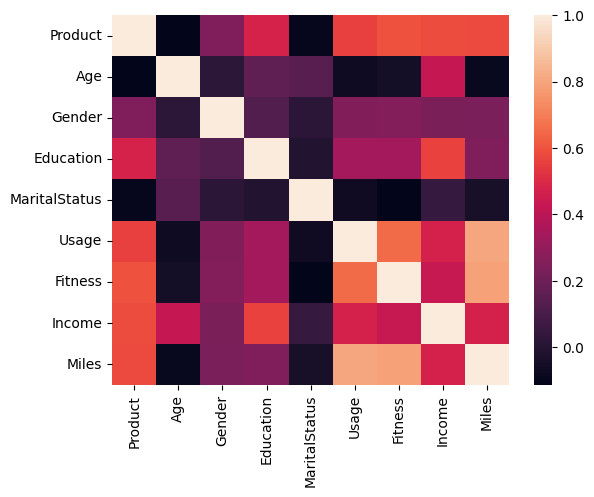

In [ ]:
sns.heatmap(percent_df.corr())

In [ ]:
# 6. Customer profiling and recommendation
# Make customer profilings for each and every product.

# Segmenting customers who purchased the KP281
product_customers = percent_df[percent_df['Product'] == 281]

# Exploring customer data for the specific product and annalyzing various factors such as demographics, usage patterns, etc.
age_distribution = product_customers['Age'].describe()
gender_distribution = product_customers['Gender'].value_counts()
education_distribution = product_customers['Education'].value_counts()


# Create customer profiles
customer_profile = {
    'Product': "KP281",
    'Age Distribution': age_distribution,
    'Gender Distribution': gender_distribution,
    'Education Distribution': education_distribution,
}
print("Customer Profile for", "KP281", ":")
print(customer_profile)


Customer Profile for KP281 :
{'Product': 'KP281', 'Age Distribution': count    74.000000
mean     29.297297
std       6.986738
min      20.000000
25%      24.000000
50%      27.000000
75%      33.750000
max      50.000000
Name: Age, dtype: float64, 'Gender Distribution': Gender
0    38
1    36
Name: count, dtype: int64, 'Education Distribution': Education
16    39
14    27
15     3
13     2
18     2
12     1
Name: count, dtype: int64}


In [ ]:
'''
Insights:
  - Out of the following Makes who are having an age of 50 and education of 16 are more likely to buy the product
  - Based on these inferences, we can conclude that the typical customer profile for KP281 includes
  - relatively young individuals, both male and female, with educational backgrounds ranging from high school to bachelor's degree level.
  - This information can be valuable for marketing strategies, product development, and targeting specific customer segments.
'''

In [ ]:
# Segmenting customers who purchased the KP481
product_customers = percent_df[percent_df['Product'] == 481]

# Exploring customer data for the specific product and analyzing various factors such as demographics, usage patterns, etc.
age_distribution = product_customers['Age'].describe()
gender_distribution = product_customers['Gender'].value_counts()
education_distribution = product_customers['Education'].value_counts()

# Create customer profiles
customer_profile = {
    'Product': "KP481",
    'Age Distribution': age_distribution,
    'Gender Distribution': gender_distribution,
    'Education Distribution': education_distribution,
}
print("Customer Profile for", "KP481", ":")
print(customer_profile)

Customer Profile for KP481 :
{'Product': 'KP481', 'Age Distribution': count    57.000000
mean     29.368421
std       6.482481
min      20.000000
25%      25.000000
50%      27.000000
75%      34.000000
max      48.000000
Name: Age, dtype: float64, 'Gender Distribution': Gender
0    29
1    28
Name: count, dtype: int64, 'Education Distribution': Education
16    31
14    21
13     2
18     2
15     1
Name: count, dtype: int64}


In [ ]:
'''
**Insights:
  - Product KP481 appears to appeal to a relatively young demographic, with a mean age of 29 years.
  - The product has a relatively balanced gender distribution among its customers.
  - The majority of customers have completed at least 14 years of education, with a significant portion having completed 16 years of education.
'''

In [ ]:
# Segmenting customers who purchased the KP781
product_customers = percent_df[percent_df['Product'] == 781]

# Exploring customer data for the specific product and analyzing various factors such as demographics, usage patterns, etc.
age_distribution = product_customers['Age'].describe()
gender_distribution = product_customers['Gender'].value_counts()
education_distribution = product_customers['Education'].value_counts()

# Create customer profiles
customer_profile = {
    'Product': "KP781",
    'Age Distribution': age_distribution,
    'Gender Distribution': gender_distribution,
    'Education Distribution': education_distribution,
}
print("Customer Profile for", "KP781", ":")
print(customer_profile)

Customer Profile for KP781 :
{'Product': 'KP781', 'Age Distribution': count    31.000000
mean     27.129032
std       5.602035
min      22.000000
25%      24.000000
50%      25.000000
75%      28.000000
max      45.000000
Name: Age, dtype: float64, 'Gender Distribution': Gender
1    26
0     5
Name: count, dtype: int64, 'Education Distribution': Education
16    13
18    12
21     3
14     2
20     1
Name: count, dtype: int64}


In [ ]:
'''
**Insights:
  - Age Distribution: The mean age of customers purchasing KP781 is around 27 years, with a range from 22 to 45 years.
  - Gender Distribution: There are more male customers than female customers for KP781.
  - Education Distribution: Majority of customers have completed at least 16 years of education, with some having completed 18 years.

**Recommendation: KP781 seems to attract slightly younger customers compared to KP281 and KP481, with a higher proportion of male customers
                  and a significant portion having completed at least 16 years of education.
'''